In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [21]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [177]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by((Measurement.date).desc()).first()[0]
print(f'the most recent date in the data is {startDate}')

the most recent date in the data is 2017-08-23


In [181]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
startDate = dt.datetime.strptime(recent,"%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.
endDate = startDate - dt.timedelta(days=365)
print(f'Most recent date: {startDate}\nOne year earlier: {endDate}')

Most recent date: 2017-08-23
One year earlier: 2016-08-23


(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

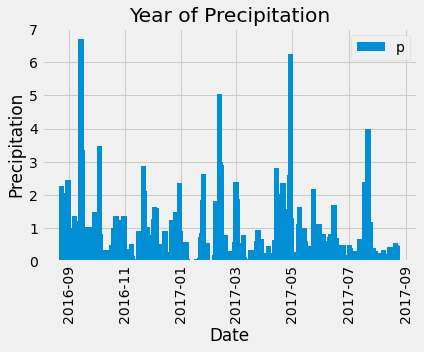

In [235]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > endDate).\
    order_by((Measurement.date).desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])

# Use Pandas Plotting with Matplotlib to plot the data
dates = df['date']
x = [dt.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
y = df['prcp']
fig, ax = plt.subplots()
ax.bar(x, y, 6)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Year of Precipitation")
ax.legend("precipitation")
plt.xticks(rotation=90)

In [183]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [125]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2566d3128b0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [186]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x256698911f0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [153]:
# Design a query to calculate the total number stations in the dataset
stationCount = session.query(func.count(Station.id)).all()
print(f'Total number of stations: {stationCount[0][0]}')

Total number of stations: 9


In [237]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [226]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_mostActive = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).first()[0]

station_df = pd.DataFrame(session.query(Measurement.tobs).\
    filter(Measurement.station == station_mostActive).all(), columns=['tobs'])
print(f'Min: {station_df.min()[0]}')
print(f'Max: {station_df.max()[0]}')
print(f'Avg: {station_df.mean()[0]}')

Min: 54.0
Max: 85.0
Avg: 71.66378066378067


Text(0.5, 0, 'Temperature')

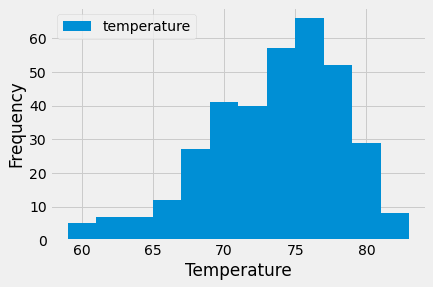

In [233]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > endDate).\
    filter(Measurement.station == station_mostActive).all(), columns=['date','temperature'])

tobs_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [234]:
# Close Session
session.close()